In [ ]:
# import pandas as pd  
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense, Dropout
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

In [ ]:
# def dataset():
#     data = pd.read_csv('final-dataset.csv')
    
#     X = data.drop(columns=['Signal','Label','Hurst Component'])
#     y = data['Label']
#     feature_names = X.columns
#     return X, y, feature_names

In [ ]:
# param_grid = {
#     'loss_function': ['categorical_crossentropy', 'binary_crossentropy'],  # Equivalent to 'criterion'
#     'class_weight': ['balanced', None],  # Equivalent to 'class_weight'
#     'lstm_units': [64, 128, 256]  # Equivalent to 'max_features'
# }


In [ ]:
# def get_feature_names(selector, feature_names):
#     mask = selector.get_support()  # List of booleans
#     return [feature for bool_val, feature in zip(mask, feature_names) if bool_val]

In [ ]:
# def feature_scaling_min_max(X):
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(X)

In [ ]:
# def feature_scaling_basic(X):
#     X = pre.scale(X)
#     return X.reshape(X.shape[0], 1, X.shape[1])  # Reshape for RNN input


In [ ]:
# # Function to create an RNN model
# def create_model(input_shape):
#     model = Sequential([
#         LSTM(128, return_sequences=False, input_shape=input_shape),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# from sklearn.metrics import confusion_matrix

# def performance_measures(model, x_test, y_test):
#     y_pred = (model.predict(x_test) > 0.5).astype(int)  # ✅ This requires a model as the first argument
#     tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#     specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
#     sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
#     return sensitivity, specificity


In [1]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense, Dropout
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split


# # Initialize tracking variables
# max_score = 0
# best_params = {}
# best_k = 2
# best_val_score = 0
# selected_names = []
# best_sensitivity = 0
# best_specificity = 0

# for k in range(2, 10):
#     X, y, feature_names = dataset()  # Load dataset

#     X = feature_scaling_min_max(X)  # Keep 2D for feature selection

#     # Feature selection (2D input required)
#     selector = SelectKBest(chi2, k=k)
#     X_new = selector.fit_transform(X, y)

#     # Reshape AFTER selection (3D for GRU)
#     X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1])

#     # Train-Test Split
#     X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
#     x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

#     # Define GRU Model
#     model = Sequential([
#         GRU(100, return_sequences=False, input_shape=(1, k)),  # k = number of selected features
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')
#     ])
    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     # Train Model
#     model.fit(X_train, y_train, epochs=100, batch_size=264, validation_data=(x_val, y_val), verbose=0)

#     # Get selected features
#     names = [feature_names[i] for i in selector.get_support(indices=True)]

#     # Evaluate Model
#     val_score = model.evaluate(x_val, y_val, verbose=0)[1]  # Accuracy
#     score = model.evaluate(x_test, y_test, verbose=0)[1]

#     # Compute Sensitivity & Specificity
#     sensitivity, specificity = performance_measures(model, x_test, y_test)
 

#     # Update Best Model
#     if score > max_score:
#         max_score = score
#         best_k = k
#         best_params = {'units': 100, 'dropout': 0.3}
#         best_val_score = val_score
#         selected_names = names
#         best_sensitivity = sensitivity
#         best_specificity = specificity

#     print(f"Passed k={k}")

# # Print Best Results
# print("Test Score:", max_score)
# print("Best params:", best_params)
# print("Best k:", best_k)
# print("Selected Features:", selected_names)
# print("Validation Score:", best_val_score)
# print("Sensitivity:", best_sensitivity)
# print("Specificity:", best_specificity)


In [2]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Initialize tracking variables
# max_score = 0
# best_params = {}
# best_k = 2
# best_val_score = 0
# selected_names = []
# best_sensitivity = 0
# best_specificity = 0

# for k in range(2, 10):
#     X, y, feature_names = dataset()  # Load dataset

#     X = feature_scaling_min_max(X)  # Keep 2D for feature selection

#     # Feature selection (2D input required)
#     selector = SelectKBest(f_classif, k=k)
#     X_new = selector.fit_transform(X, y)

#     # Reshape AFTER selection (3D for GRU)
#     X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1])

#     # Train-Test Split
#     X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
#     x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

#     # Define GRU Model
#     model = Sequential([
#         GRU(100, return_sequences=False, input_shape=(1, k)),  # k = number of selected features
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')
#     ])
    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     # Train Model
#     model.fit(X_train, y_train, epochs=100, batch_size=264, validation_data=(x_val, y_val), verbose=0)

#     # Get selected features
#     names = [feature_names[i] for i in selector.get_support(indices=True)]

#     # Evaluate Model
#     val_score = model.evaluate(x_val, y_val, verbose=0)[1]  # Accuracy
#     score = model.evaluate(x_test, y_test, verbose=0)[1]

#     # Compute Sensitivity & Specificity
#     sensitivity, specificity = performance_measures(model, x_test, y_test)

#     # Update Best Model
#     if score > max_score:
#         max_score = score
#         best_k = k
#         best_params = {'units': 100, 'dropout': 0.3}
#         best_val_score = val_score
#         selected_names = names
#         best_sensitivity = sensitivity
#         best_specificity = specificity

#     print(f"Passed k={k}")

# # Print Best Results
# print("Test Score:", max_score)
# print("Best params:", best_params)
# print("Best k:", best_k)
# print("Selected Features:", selected_names)
# print("Validation Score:", best_val_score)
# print("Sensitivity:", best_sensitivity)
# print("Specificity:", best_specificity)


In [3]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

# # Initialize tracking variables
# max_score = 0
# best_params = {}
# best_k = 2
# best_val_score = 0
# selected_names = []
# best_sensitivity = 0
# best_specificity = 0

# for k in range(2, 10):
#     X, y, feature_names = dataset()  # Load dataset

#     X = feature_scaling_min_max(X)  # Keep 2D for feature selection

#     # Feature selection (2D input required)
#     selector = SelectKBest(mutual_info_classif, k=k)
#     X_new = selector.fit_transform(X, y)

#     # Reshape AFTER selection (3D for GRU)
#     X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1])

#     # Train-Test Split
#     X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
#     x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

#     # Define GRU Model
#     model = Sequential([
#         GRU(100, return_sequences=False, input_shape=(1, k)),  # k = number of selected features
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')
#     ])
    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     # Train Model
#     model.fit(X_train, y_train, epochs=100, batch_size=264, validation_data=(x_val, y_val), verbose=0)

#     # Get selected features
#     names = [feature_names[i] for i in selector.get_support(indices=True)]

#     # Evaluate Model
#     val_score = model.evaluate(x_val, y_val, verbose=0)[1]  # Accuracy
#     score = model.evaluate(x_test, y_test, verbose=0)[1]

#     # Compute Sensitivity & Specificity
#     sensitivity, specificity = performance_measures(model, x_test, y_test)

#     # Update Best Model
#     if score > max_score:
#         max_score = score
#         best_k = k
#         best_params = {'units': 100, 'dropout': 0.3}
#         best_val_score = val_score
#         selected_names = names
#         best_sensitivity = sensitivity
#         best_specificity = specificity

#     print(f"Passed k={k}")

# # Print Best Results
# print("Test Score:", max_score)
# print("Best params:", best_params)
# print("Best k:", best_k)
# print("Selected Features:", selected_names)
# print("Validation Score:", best_val_score)
# print("Sensitivity:", best_sensitivity)
# print("Specificity:", best_specificity)


In [4]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay

# # Function to plot ROC Curve
# def plot_roc_curve(model, X_test, y_test, title):
#     y_pred_probs = model.predict(X_test).ravel()  # Get predicted probabilities
#     RocCurveDisplay.from_predictions(y_test, y_pred_probs)  

#     plt.title(title)
#     plt.show()

# # Plot ROC for all GRU models
# plot_roc_curve(model, x_test, y_test, "ROC Curve for GRU Model with Chi2 Feature Selection")
# plot_roc_curve(model, x_test, y_test, "ROC Curve for GRU Model with f_classif Feature Selection")
# plot_roc_curve(model, x_test, y_test, "ROC Curve for GRU Model with Mutual Information Feature Selection")


Running Chi2 Feature Selection
Epoch 1/100


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5296 - loss: 0.6928 - val_accuracy: 0.5857 - val_loss: 0.6924
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5617 - loss: 0.6919 - val_accuracy: 0.5286 - val_loss: 0.6922
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5348 - loss: 0.6918 - val_accuracy: 0.5333 - val_loss: 0.6919
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5452 - loss: 0.6921 - val_accuracy: 0.5476 - val_loss: 0.6914
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5581 - loss: 0.6910 - val_accuracy: 0.5476 - val_loss: 0.6910
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5655 - loss: 0.6905 - val_accuracy: 0.5476 - val_loss: 0.6905
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5832 - loss: 0.6896 - val_accuracy: 0.5429 - val_loss: 0.6899
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5902 - loss: 0.6884 - val_accuracy: 0.5429 - val_loss: 0.6892
Epoc

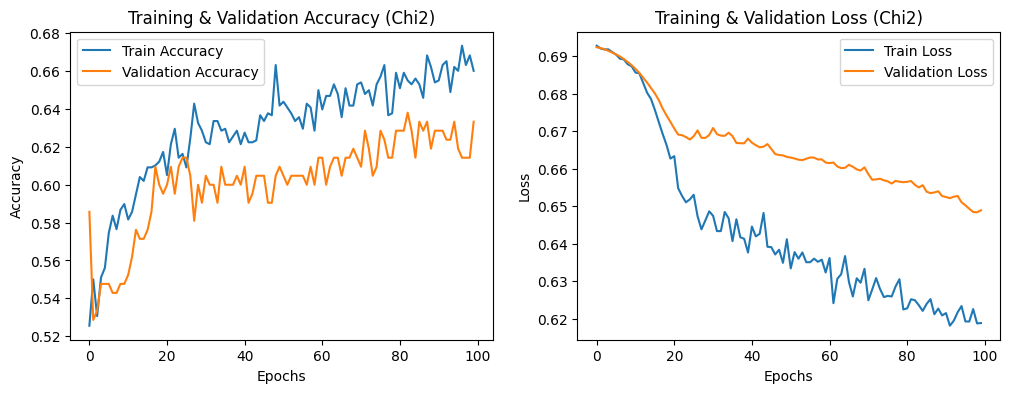

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


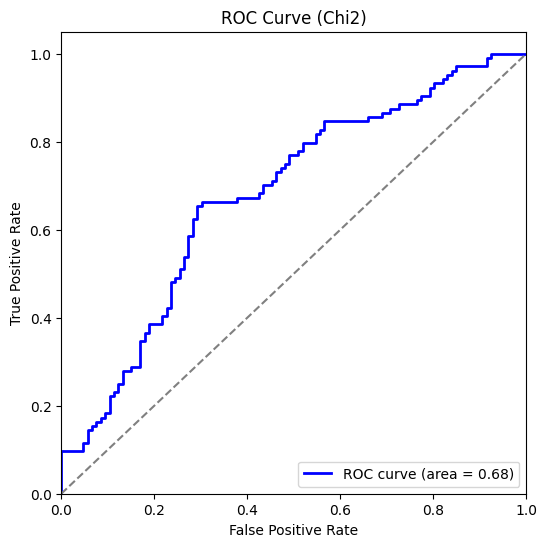

Chi2 - Test Accuracy: 0.6762, Precision: 0.6765, Recall: 0.6635, F1-Score: 0.6699, Sensitivity: 0.6635, Specificity: 0.6887
Selected Features:  ['x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13' 'x15']
Running F_classif Feature Selection
Epoch 1/100


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5388 - loss: 0.6930 - val_accuracy: 0.6048 - val_loss: 0.6926
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5440 - loss: 0.6926 - val_accuracy: 0.5190 - val_loss: 0.6922
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5450 - loss: 0.6918 - val_accuracy: 0.5619 - val_loss: 0.6917
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5516 - loss: 0.6913 - val_accuracy: 0.5952 - val_loss: 0.6912
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6070 - loss: 0.6906 - val_accuracy: 0.5952 - val_loss: 0.6906
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5996 - loss: 0.6895 - val_accuracy: 0.6000 - val_loss: 0.6899
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6274 - loss: 0.6884 - val_accuracy: 0.5905 - val_loss: 0.6891
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5931 - loss: 0.6873 - val_accuracy: 0.5810 - val_loss: 0.6881
Epoc

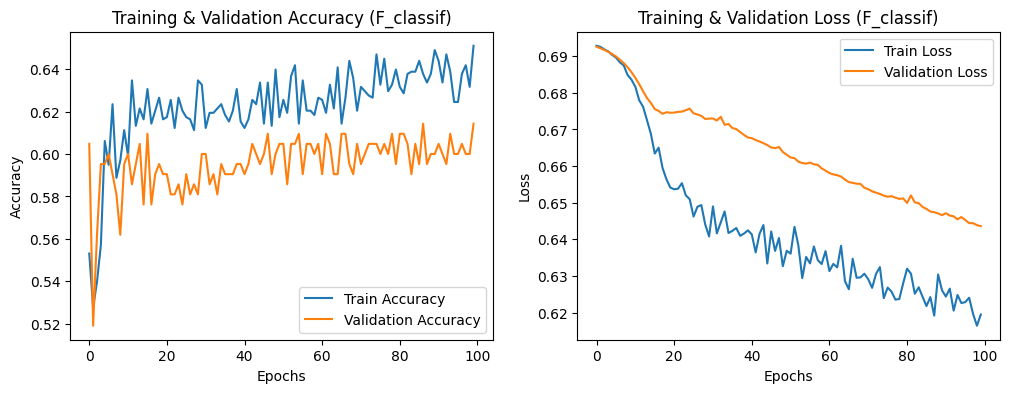

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


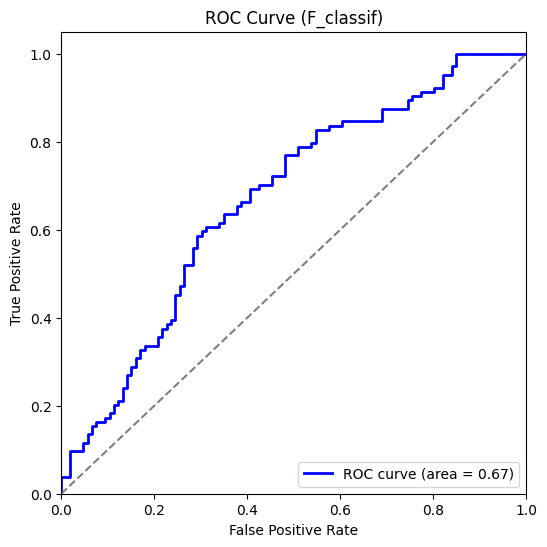

F_classif - Test Accuracy: 0.6333, Precision: 0.6195, Recall: 0.6731, F1-Score: 0.6452, Sensitivity: 0.6731, Specificity: 0.5943
Selected Features:  ['x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13' 'x15']
Running Mutual_Info Feature Selection
Epoch 1/100


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4846 - loss: 0.6931 - val_accuracy: 0.5048 - val_loss: 0.6930
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4923 - loss: 0.6930 - val_accuracy: 0.5095 - val_loss: 0.6929
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5389 - loss: 0.6926 - val_accuracy: 0.5238 - val_loss: 0.6928
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5677 - loss: 0.6923 - val_accuracy: 0.5048 - val_loss: 0.6926
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5469 - loss: 0.6921 - val_accuracy: 0.5095 - val_loss: 0.6925
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5627 - loss: 0.6915 - val_accuracy: 0.5143 - val_loss: 0.6923
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5331 - loss: 0.6911 - val_accuracy: 0.5143 - val_loss: 0.6920
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5545 - loss: 0.6905 - val_accuracy: 0.5190 - val_loss: 0.6917
Epoc

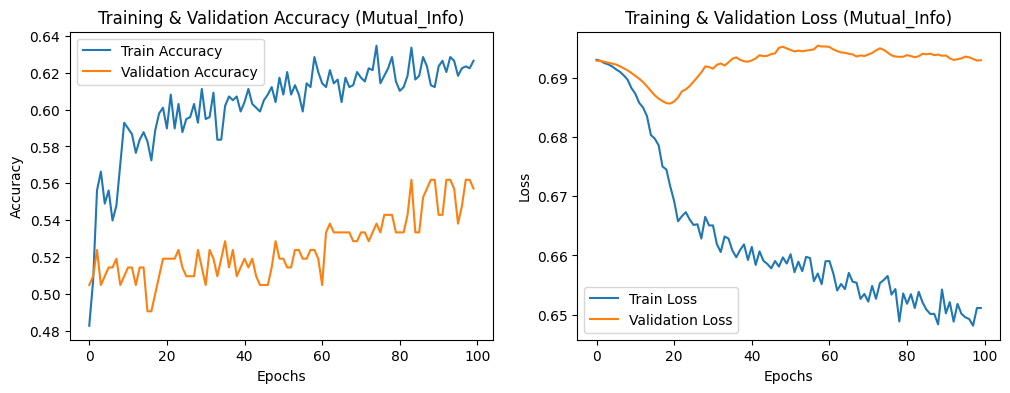

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


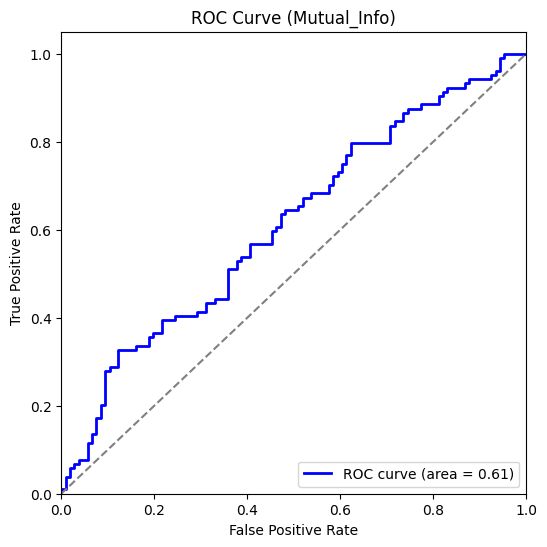

Mutual_Info - Test Accuracy: 0.5619, Precision: 0.5462, Recall: 0.6827, F1-Score: 0.6068, Sensitivity: 0.6827, Specificity: 0.4434
Selected Features:  ['x1' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x11' 'x15']

Total Execution Time: 33.20 seconds


In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Function to load dataset
def dataset():
    data = pd.read_csv('final-dataset.csv')
    X = data.drop(columns=['Signal', 'Label', 'Hurst Component'])
    y = data['Label']
    return X, y, X.columns

# Min-Max feature scaling
def feature_scaling_min_max(X):
    return MinMaxScaler().fit_transform(X)

# Function to compute performance metrics
def performance_measures(model, x_test, y_test):
    y_pred = (model.predict(x_test) > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    report = classification_report(y_test, y_pred, output_dict=True)
    precision, recall, f1_score, test_acc = report['1']['precision'], report['1']['recall'], report['1']['f1-score'], report['accuracy']
    return test_acc, precision, recall, f1_score, sensitivity, specificity

# Function to create GRU model
def create_gru(input_shape):
    model = Sequential([
        GRU(64, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to run the entire pipeline for a given feature selection method
def run_experiment(selection_method, k, method_name):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)

    # Feature selection
    selector = SelectKBest(selection_method, k=k)
    X_new = selector.fit_transform(X, y)

    # Train-Test-Validation split
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

    # Reshape for GRU (samples, timesteps, features)
    X_train = np.expand_dims(X_train, axis=1)
    x_val = np.expand_dims(x_val, axis=1)
    x_test = np.expand_dims(x_test, axis=1)

    # Create and train the GRU model
    model = create_gru((1, X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=264, validation_data=(x_val, y_val), verbose=1)

    # Evaluate model performance
    test_acc, precision, recall, f1_score, sensitivity, specificity = performance_measures(model, x_test, y_test)

    # Plot training accuracy & loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Training & Validation Accuracy ({method_name})")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training & Validation Loss ({method_name})")
    plt.legend()
    plt.show()

    # ROC Curve
    y_pred_probs = model.predict(x_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({method_name})")
    plt.legend(loc="lower right")
    plt.show()

    return test_acc, precision, recall, f1_score, sensitivity, specificity, selector.get_feature_names_out()

# Start timer to measure execution time
start_time = time.time()

# Running for different feature selection methods
for method, name in zip([chi2, f_classif, mutual_info_classif], ["Chi2", "F_classif", "Mutual_Info"]):
    print(f"Running {name} Feature Selection")
    score, precision, recall, f1, sens, spec, selected_features = run_experiment(method, k=10, method_name=name)
    print(f"{name} - Test Accuracy: {score:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Sensitivity: {sens:.4f}, Specificity: {spec:.4f}")
    print("Selected Features: ", selected_features)

# End timer and print total execution time
end_time = time.time()
total_time = end_time - start_time
print(f"\nTotal Execution Time: {total_time:.2f} seconds")



 Running Chi2 Feature Selection
Epoch 1/500


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5317 - loss: 0.6914 - val_accuracy: 0.5857 - val_loss: 0.6880
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6044 - loss: 0.6830 - val_accuracy: 0.5952 - val_loss: 0.6816
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5913 - loss: 0.6718 - val_accuracy: 0.5476 - val_loss: 0.6784
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6142 - loss: 0.6623 - val_accuracy: 0.5714 - val_loss: 0.6794
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5868 - loss: 0.6704 - val_accuracy: 0.5857 - val_loss: 0.6771
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.6495 - val_accuracy: 0.5810 - val_loss: 0.6795
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6064 - loss: 0.6499 - val_accuracy: 0.5667 - val_loss: 0.6779
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.6351 - val_accuracy: 0.5810 - val_loss: 0.

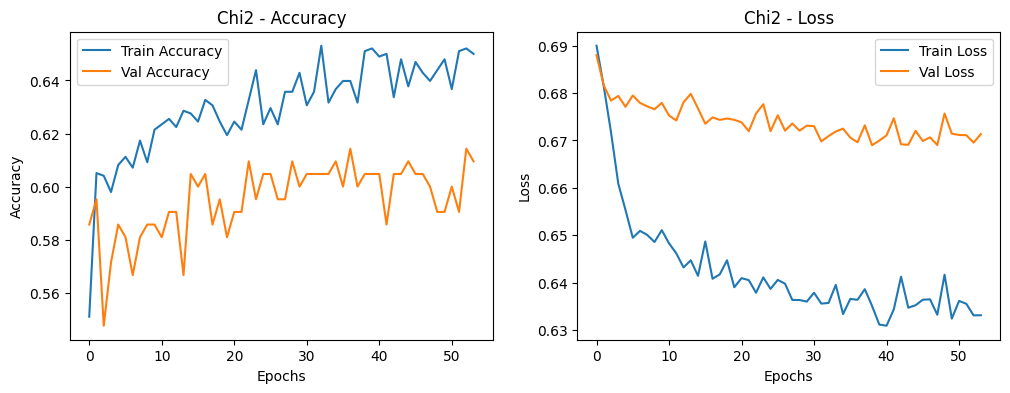

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


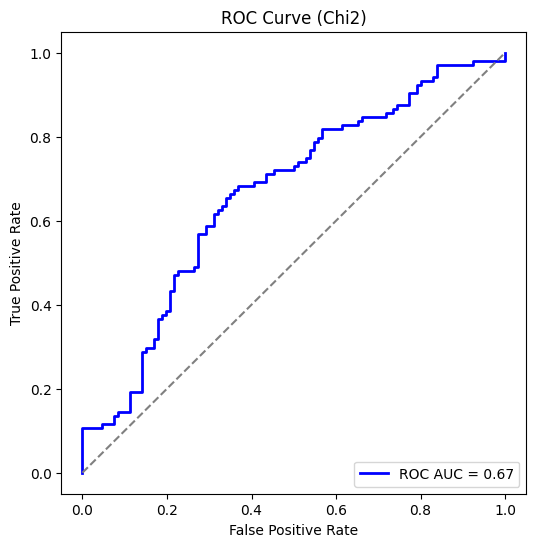


 Chi2 Performance:
 Accuracy     : 0.6476
 Precision    : 0.6471
 Recall       : 0.6346
 F1 Score     : 0.6408
 Sensitivity  : 0.6346
 Specificity  : 0.6604
 Time Taken   : 10.04 seconds
 Selected Features: ['x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13' 'x15']

Chi2 - Accuracy: 0.6476, Precision: 0.6471, Recall: 0.6346, F1: 0.6408, Sens: 0.6346, Spec: 0.6604

 Running F_classif Feature Selection
Epoch 1/500


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4879 - loss: 0.6925 - val_accuracy: 0.5048 - val_loss: 0.6884
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5022 - loss: 0.6847 - val_accuracy: 0.5286 - val_loss: 0.6834
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5767 - loss: 0.6762 - val_accuracy: 0.5857 - val_loss: 0.6800
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5824 - loss: 0.6767 - val_accuracy: 0.5905 - val_loss: 0.6792
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6138 - loss: 0.6614 - val_accuracy: 0.5857 - val_loss: 0.6808
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5828 - loss: 0.6752 - val_accuracy: 0.5857 - val_loss: 0.6799
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6255 - loss: 0.6511 - val_accuracy: 0.5905 - val_loss: 0.6813
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6167 - loss: 0.6601 - val_accuracy: 0.5857 - val_loss: 0.

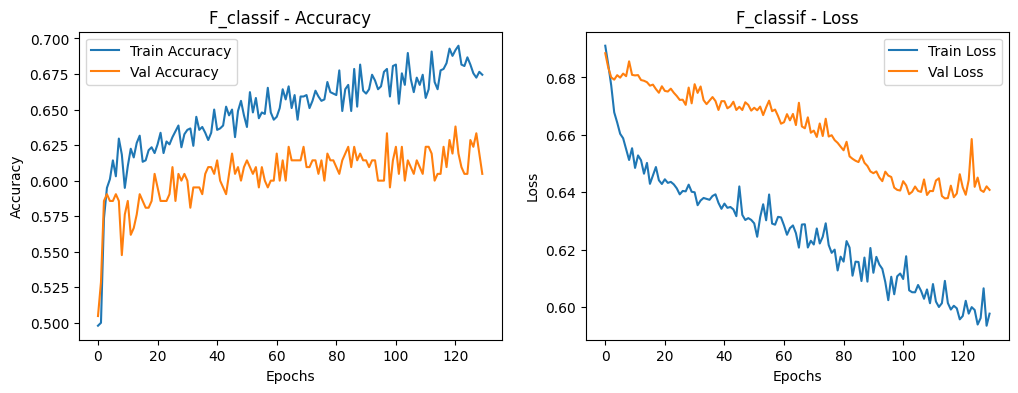

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


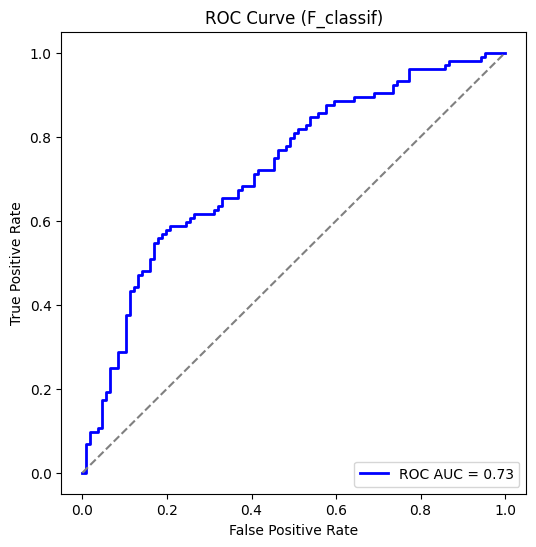


 F_classif Performance:
 Accuracy     : 0.6476
 Precision    : 0.6271
 Recall       : 0.7115
 F1 Score     : 0.6667
 Sensitivity  : 0.7115
 Specificity  : 0.5849
 Time Taken   : 20.81 seconds
 Selected Features: ['x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13' 'x15']

F_classif - Accuracy: 0.6476, Precision: 0.6271, Recall: 0.7115, F1: 0.6667, Sens: 0.7115, Spec: 0.5849

 Running Mutual_Info Feature Selection
Epoch 1/500


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4674 - loss: 0.6936 - val_accuracy: 0.5429 - val_loss: 0.6925
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5270 - loss: 0.6924 - val_accuracy: 0.5429 - val_loss: 0.6918
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5699 - loss: 0.6901 - val_accuracy: 0.5238 - val_loss: 0.6895
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5784 - loss: 0.6842 - val_accuracy: 0.4952 - val_loss: 0.6867
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5435 - loss: 0.6801 - val_accuracy: 0.5143 - val_loss: 0.6860
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5650 - loss: 0.6700 - val_accuracy: 0.5000 - val_loss: 0.6871
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 0.6662 - val_accuracy: 0.5095 - val_loss: 0.6884
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 0.6594 - val_accuracy: 0.5000 - val_loss: 0.

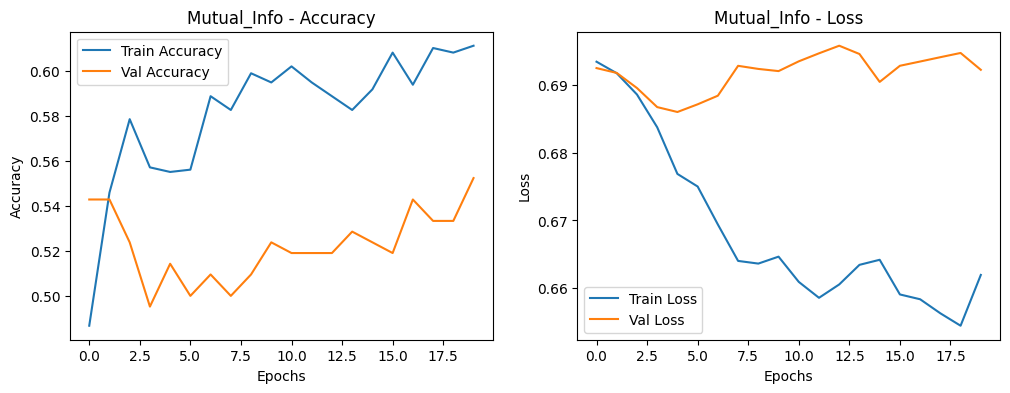

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


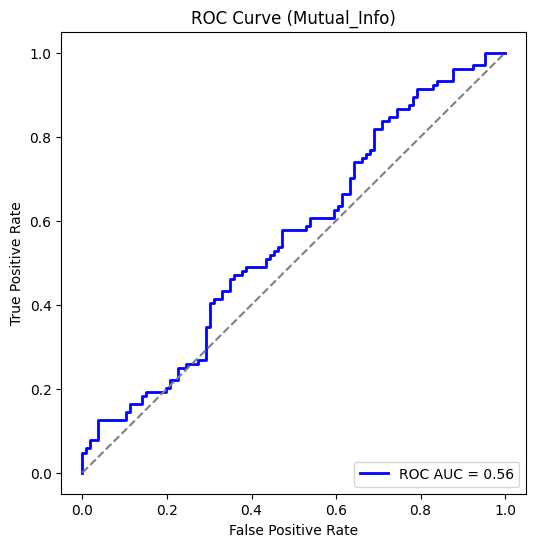


 Mutual_Info Performance:
 Accuracy     : 0.5476
 Precision    : 0.5269
 Recall       : 0.8462
 F1 Score     : 0.6494
 Sensitivity  : 0.8462
 Specificity  : 0.2547
 Time Taken   : 5.08 seconds
 Selected Features: ['x1' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x11' 'x14' 'x15']

Mutual_Info - Accuracy: 0.5476, Precision: 0.5269, Recall: 0.8462, F1: 0.6494, Sens: 0.8462, Spec: 0.2547

 Total Execution Time: 38.18 seconds


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
def dataset():
    data = pd.read_csv('final-dataset.csv')
    X = data.drop(columns=['Signal', 'Label', 'Hurst Component'])
    y = data['Label']
    return X, y, X.columns

# Min-Max Scaling
def feature_scaling_min_max(X):
    return MinMaxScaler().fit_transform(X)

# Performance Metrics
def performance_measures(model, x_test, y_test):
    y_pred = (model.predict(x_test) > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    test_acc = report['accuracy']
    return test_acc, precision, recall, f1, sensitivity, specificity

# GRU Model
def create_gru(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Pipeline
def run_experiment(selection_method, k, method_name):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)

    selector = SelectKBest(selection_method, k=k)
    X_new = selector.fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

    X_train = np.expand_dims(X_train, axis=1)
    x_val = np.expand_dims(x_val, axis=1)
    x_test = np.expand_dims(x_test, axis=1)

    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = dict(enumerate(class_weights))

    model = create_gru((1, X_train.shape[2]))
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    start = time.time()
    history = model.fit(X_train, y_train, epochs=500, batch_size=32,
                        validation_data=(x_val, y_val),
                        class_weight=class_weights_dict,
                        callbacks=[early_stop], verbose=1)
    exec_time = time.time() - start

    test_acc, precision, recall, f1, sens, spec = performance_measures(model, x_test, y_test)

    # Accuracy & Loss plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{method_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{method_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # ROC Curve
    y_pred_probs = model.predict(x_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({method_name})")
    plt.legend(loc="lower right")
    plt.show()

    print(f"\n {method_name} Performance:")
    print(f" Accuracy     : {test_acc:.4f}")
    print(f" Precision    : {precision:.4f}")
    print(f" Recall       : {recall:.4f}")
    print(f" F1 Score     : {f1:.4f}")
    print(f" Sensitivity  : {sens:.4f}")
    print(f" Specificity  : {spec:.4f}")
    print(f" Time Taken   : {exec_time:.2f} seconds")
    print(f" Selected Features: {selector.get_feature_names_out()}\n")

    return test_acc, precision, recall, f1, sens, spec, selector.get_feature_names_out()

# Run All Experiments
start_time = time.time()

for method, name in zip([chi2, f_classif, mutual_info_classif], ["Chi2", "F_classif", "Mutual_Info"]):
    print(f"\n Running {name} Feature Selection")
    score, precision, recall, f1, sens, spec, selected = run_experiment(method, k=10, method_name=name)
    print(f"{name} - Accuracy: {score:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Sens: {sens:.4f}, Spec: {spec:.4f}")

end_time = time.time()
print(f"\n Total Execution Time: {end_time - start_time:.2f} seconds")



--- Running GRU with CHI2 features ---


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(
c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


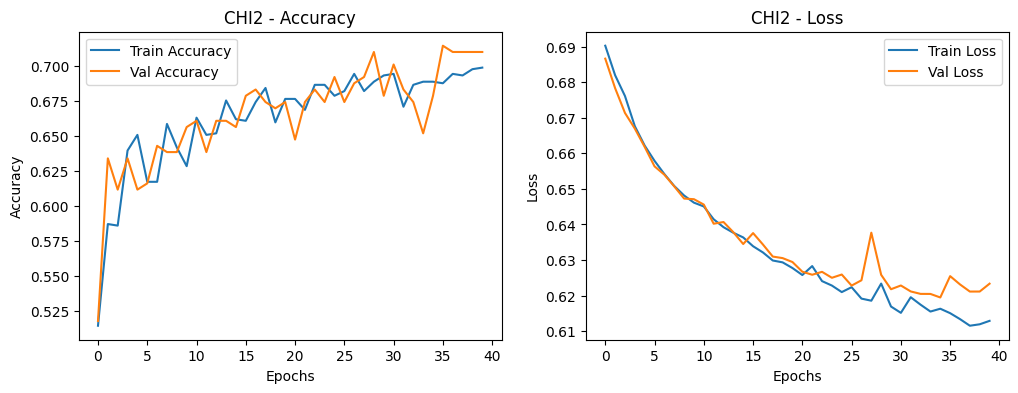

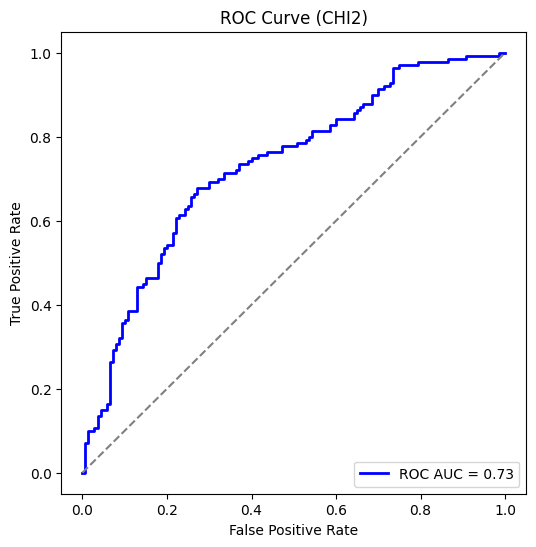


CHI2 GRU Performance:
 Accuracy     : 0.6750
 Precision    : 0.6522
 Recall       : 0.7500
 F1 Score     : 0.6977
 Sensitivity  : 0.7500
 Specificity  : 0.6000
 Time Taken   : 6.05 seconds
 Selected Features: ['Mean (µV)', 'RMS (µV)', 'MRS (µV)', 'Zero Crossings', 'Frequency (Hz)', 'Delta (µV² /Hz)', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Variance', 'Kurtosis', 'Hjorth Mobility', 'Hjorth Complexity', 'Spectral Entropy']


--- Running GRU with F_CLASSIF features ---


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(
c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


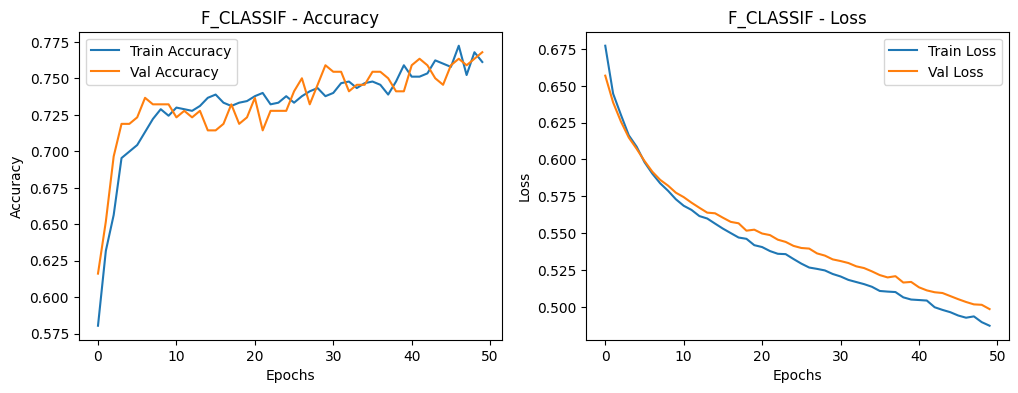

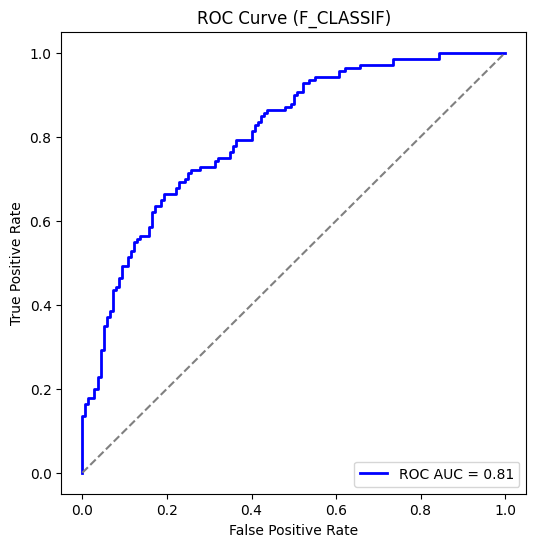


F_CLASSIF GRU Performance:
 Accuracy     : 0.7071
 Precision    : 0.6859
 Recall       : 0.7643
 F1 Score     : 0.7230
 Sensitivity  : 0.7643
 Specificity  : 0.6500
 Time Taken   : 6.87 seconds
 Selected Features: ['Mean (µV)', 'RMS (µV)', 'MRS (µV)', 'Zero Crossings', 'Frequency (Hz)', 'Delta (µV² /Hz)', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Variance', 'Kurtosis', 'Hjorth Mobility', 'Hjorth Complexity', 'Spectral Entropy']


--- Running GRU with MUTUAL_INFO features ---


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(
c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


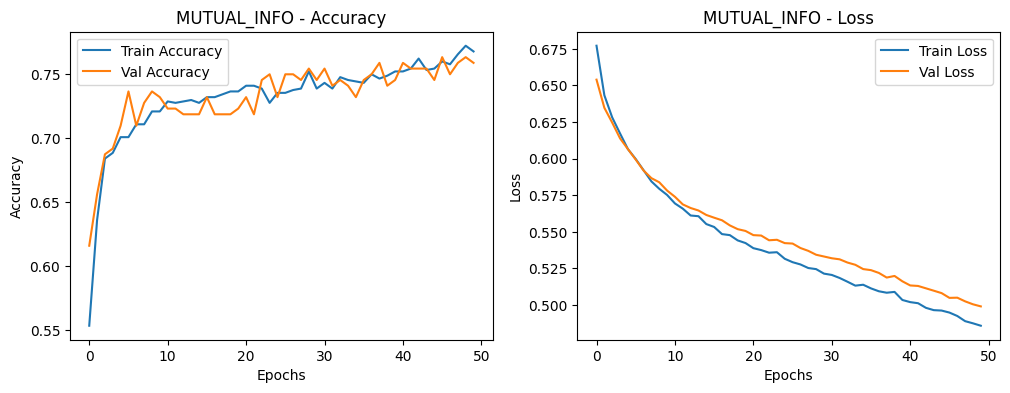

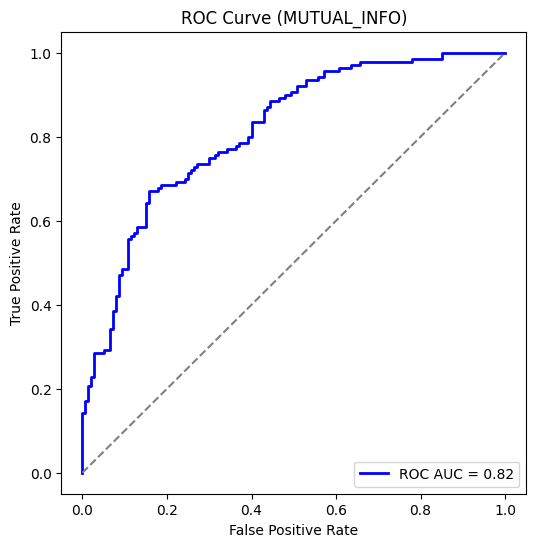


MUTUAL_INFO GRU Performance:
 Accuracy     : 0.7214
 Precision    : 0.7039
 Recall       : 0.7643
 F1 Score     : 0.7329
 Sensitivity  : 0.7643
 Specificity  : 0.6786
 Time Taken   : 6.89 seconds
 Selected Features: ['Mean (µV)', 'RMS (µV)', 'MRS (µV)', 'Zero Crossings', 'Frequency (Hz)', 'Delta (µV² /Hz)', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Variance', 'Kurtosis', 'Hjorth Mobility', 'Hjorth Complexity', 'Spectral Entropy']



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------
# Load Dataset
# ---------------------------
def load_dataset():
    data = pd.read_csv('final-dataset.csv')
    X = data.drop(columns=['Signal', 'Label', 'Hurst Component'])
    y = data['Label']
    return X, y

# ---------------------------
# Feature Selection
# ---------------------------
def select_features(X, y, method, k=20):
    feature_names = X.columns

    if method == 'chi2':
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        selector = SelectKBest(score_func=chi2, k=k)
    elif method == 'f_classif':
        X_scaled = StandardScaler().fit_transform(X)
        selector = SelectKBest(score_func=f_classif, k=k)
    elif method == 'mutual_info':
        X_scaled = StandardScaler().fit_transform(X)
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
    else:
        raise ValueError("Invalid method")

    selector.fit(X_scaled, y)
    selected_feature_names = feature_names[selector.get_support()]
    X_selected = selector.transform(X_scaled)
    
    return X_selected, selected_feature_names

# ---------------------------
# Build GRU Model
# ---------------------------
def build_gru_model(input_shape, units=128, loss='binary_crossentropy'):
    model = Sequential()
    model.add(GRU(units, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return model

# ---------------------------
# Train & Evaluate GRU
# ---------------------------
def train_and_evaluate_gru(X_selected, y, method_name, selected_feature_names):
    start_time = time.time()

    # Reshape for GRU
    X_selected = X_selected.reshape((X_selected.shape[0], 1, X_selected.shape[1]))

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

    model = build_gru_model(input_shape=(1, X_selected.shape[2]))

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.2, callbacks=[early_stop], verbose=0)

    # Evaluate
    y_pred_probs = model.predict(X_test).ravel()
    y_pred = (y_pred_probs > 0.5).astype("int32")

    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    sens = recall
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp)
    exec_time = time.time() - start_time

    # -----------------------
    # Accuracy & Loss Plot
    # -----------------------
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{method_name.upper()} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{method_name.upper()} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # -----------------------
    # ROC Curve
    # -----------------------
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({method_name.upper()})")
    plt.legend(loc="lower right")
    plt.show()

    # -----------------------
    # Print Performance
    # -----------------------
    print(f"\n{method_name.upper()} GRU Performance:")
    print(f" Accuracy     : {test_acc:.4f}")
    print(f" Precision    : {precision:.4f}")
    print(f" Recall       : {recall:.4f}")
    print(f" F1 Score     : {f1:.4f}")
    print(f" Sensitivity  : {sens:.4f}")
    print(f" Specificity  : {spec:.4f}")
    print(f" Time Taken   : {exec_time:.2f} seconds")
    print(f" Selected Features: {selected_feature_names.tolist()}\n")

    return test_acc, precision, recall, f1, sens, spec, selected_feature_names.tolist()

# ---------------------------
# Run for All Feature Methods
# ---------------------------
X, y = load_dataset()

for method in ['chi2', 'f_classif', 'mutual_info']:
    print(f"\n--- Running GRU with {method.upper()} features ---")
    X_selected, selected_feature_names = select_features(X, y, method, k=20)
    train_and_evaluate_gru(X_selected, y, method, selected_feature_names)
